In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Reading D.xlsx to Reading D (1).xlsx


In [ ]:
import pandas as pd

# Baca seluruh Excel untuk melihat daftar sheet (jika perlu)
xls = pd.ExcelFile("Reading D.xlsx")

# Lihat daftar nama sheet
print(xls.sheet_names)

# Baca salah satu sheet berdasarkan nama (misal sheet pertama)
df = xls.parse(xls.sheet_names[0])
df.head()


['TPE-HE Reading', 'Sheet1']


,Surname,First name,ID number,Email address,Institution,State,Started on,Completed,Time taken,Grade/50.00,...,P.41,P.42,P.43,P.44,P.45,P.46,P.47,P.48,P.49,P.50
0,KALAHARI,LITUHAYU,106052430003,lituhayukalahari@student.telkomuniversity.ac.id,NaN,Finished,20 October 2024 11:03 AM,20 October 2024 11:50 AM,46 mins 48 secs,46,...,C,C,C,C,C,C,C,C,C,C
1,LEILARAMADHANI,OKTARIZKY,101022400145,oktarizky@student.telkomuniversity.ac.id,NaN,Finished,10 October 2024 10:53 AM,10 October 2024 11:42 AM,48 mins 50 secs,37,...,B,C,C,C,C,C,C,C,C,D
2,MARIETHA SARAGIH,LAURA,101012400252,lauramariethasaragih@student.telkomuniversity....,NaN,Finished,17 October 2024 2:05 PM,17 October 2024 2:44 PM,38 mins 46 secs,36,...,C,C,C,C,C,C,C,C,B,C
3,PUTRIDIARTA,ATIKAH,106012430013,atikahputridiarta@student.telkomuniversity.ac.id,NaN,Finished,15 October 2024 2:00 PM,15 October 2024 2:43 PM,43 mins 5 secs,36,...,A,D,C,C,C,C,C,B,C,C
4,ADELLA SHANDRINA,NAFIDZA,102012400271,nafidzaadella@student.telkomuniversity.ac.id,NaN,Finished,18 October 2024 8:01 AM,18 October 2024 8:45 AM,44 mins 28 secs,35,...,A,D,D,D,D,C,C,A,B,C


In [ ]:
import pandas as pd
import numpy as np

# Load file
df = pd.read_excel("Reading D.xlsx")

# Salin dan persiapkan
df = df.copy()
df['grade'] = df['Grade/50.00'] # Corrected column name
jawaban_cols = [col for col in df.columns if col.startswith("P.")]

# Sort dan ambil 27% atas & bawah
df_sorted = df.sort_values(by='grade', ascending=False)
n_total = len(df_sorted)
n_27 = int(np.floor(n_total * 0.27))
top_group = df_sorted.head(n_27)
bottom_group = df_sorted.tail(n_27)

# Fungsi hitung Distractor Power
def calculate_dp_for_item(col):
    opsi_list = ['A', 'B', 'C', 'D']
    dp_result = {}
    top_counts = top_group[col].value_counts(normalize=True) * 100
    bottom_counts = bottom_group[col].value_counts(normalize=True) * 100

    for opsi in opsi_list:
        atas = top_counts.get(opsi, 0)
        bawah = bottom_counts.get(opsi, 0)
        dp = round(atas - bawah, 2)
        dp_result[opsi] = dp
    return dp_result

# Hitung semua soal
dp_all = {col: calculate_dp_for_item(col) for col in jawaban_cols}
dp_df = pd.DataFrame(dp_all).T
dp_df.index.name = 'Soal'
dp_df.columns = ['DP_A', 'DP_B', 'DP_C', 'DP_D']

# Simpan hasil ke Excel
dp_df.to_excel("Distractor_Power_Output.xlsx")

In [ ]:
# Tampilkan hasil
display(dp_df)
tabeldistraktor = dp_df

,DP_A,DP_B,DP_C,DP_D
Soal,,,,
P.1,-14.63,-12.20,34.15,-7.32
P.2,-21.95,-2.44,31.71,-7.32
P.3,-12.20,-29.27,46.34,-4.88
P.4,-9.76,-19.51,36.59,-7.32
P.5,-24.39,-31.71,60.98,-4.88
P.6,-14.63,-7.32,43.90,-21.95
P.7,0.00,-31.71,34.15,-2.44
P.8,12.20,-17.07,0.00,4.88
P.9,-9.76,-12.20,31.71,-9.76


In [ ]:
import pandas as pd

# Misal dp_df sudah berisi kolom DP_A, DP_B, DP_C, DP_D

def klasifikasi_distraktor(row):
    dp_opsi = [row['DP_A'], row['DP_B'], row['DP_C'], row['DP_D']]
    efektif_count = sum(1 for val in dp_opsi if val < -1)

    if efektif_count >= 2:
        return "Baik"
    elif efektif_count == 1:
        return "Cukup"
    else:
        return "Perlu Revisi"

# Tambahkan kolom kategori
dp_df['Kategori'] = dp_df.apply(klasifikasi_distraktor, axis=1)

# Simpan hasil ke Excel
dp_df.to_excel("Distractor_Power_Kategori.xlsx", index=True)

# Download file hasil
from google.colab import files
files.download("Distractor_Power_Kategori.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Tampilkan hasil
display(dp_df)

,DP_A,DP_B,DP_C,DP_D,Kategori
Soal,,,,,
P.1,-14.63,-12.20,34.15,-7.32,Baik
P.2,-21.95,-2.44,31.71,-7.32,Baik
P.3,-12.20,-29.27,46.34,-4.88,Baik
P.4,-9.76,-19.51,36.59,-7.32,Baik
P.5,-24.39,-31.71,60.98,-4.88,Baik
P.6,-14.63,-7.32,43.90,-21.95,Baik
P.7,0.00,-31.71,34.15,-2.44,Baik
P.8,12.20,-17.07,0.00,4.88,Cukup
P.9,-9.76,-12.20,31.71,-9.76,Baik


**Distractor Power**

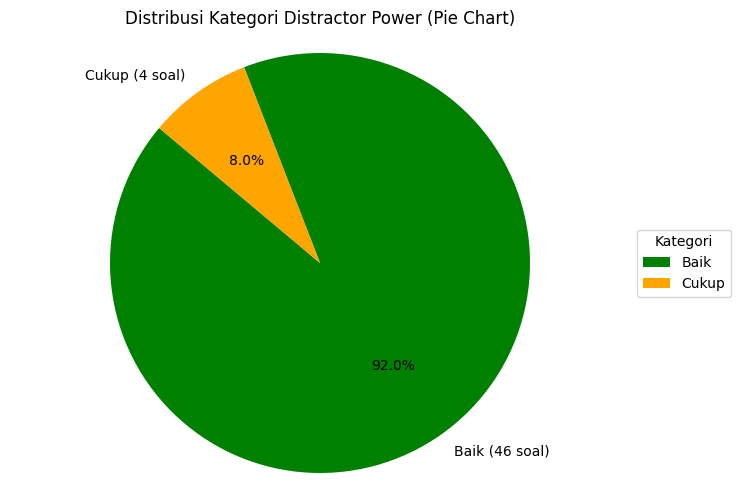

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan dp_df adalah dataframe yang sudah ada
# Hitung jumlah soal per kategori
kategori_counts = dp_df['Kategori'].value_counts()

# Hitung jumlah kategori
kategori_counts = dp_df['Kategori'].value_counts()
colors = {'Baik': 'green', 'Cukup': 'orange', 'Perlu Revisi': 'red'}

# Buat pie chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    kategori_counts,
    labels=[f"{k} ({v} soal)" for k, v in kategori_counts.items()],
    colors=[colors[k] for k in kategori_counts.index],
    autopct='%1.1f%%',
    startangle=140
)
ax.set_title("Distribusi Kategori Distractor Power (Pie Chart)")
plt.axis('equal')
plt.legend(wedges, kategori_counts.index, title="Kategori", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [ ]:
import pandas as pd

# Asumsikan dp_df sudah tersedia dengan index sebagai 'P.x' dan kolom 'Kategori'

# Ambil daftar soal berdasarkan kategori
soal_baik = dp_df[dp_df['Kategori'] == 'Baik'].index.tolist()
soal_cukup = dp_df[dp_df['Kategori'] == 'Cukup'].index.tolist()
soal_perlu_revisi = dp_df[dp_df['Kategori'] == 'Perlu Revisi'].index.tolist()

# Hitung panjang maksimum untuk penyesuaian jumlah baris
max_len = max(len(soal_baik), len(soal_cukup), len(soal_perlu_revisi))

# Isi kekurangan dengan nilai kosong agar sejajar
soal_baik += [''] * (max_len - len(soal_baik))
soal_cukup += [''] * (max_len - len(soal_cukup))
soal_perlu_revisi += [''] * (max_len - len(soal_perlu_revisi))

# Buat DataFrame dengan format sejajar
tabel_kategori_sejajar = pd.DataFrame({
    "Baik": soal_baik,
    "Cukup": soal_cukup,
    "Perlu Revisi": soal_perlu_revisi
})


# Tampilkan hasil
display(tabel_kategori_sejajar)

,Baik,Cukup,Perlu Revisi
0,P.1,P.8,
1,P.2,P.11,
2,P.3,P.41,
3,P.4,P.48,
4,P.5,,
5,P.6,,
6,P.7,,
7,P.9,,
8,P.10,,
9,P.12,,


In [ ]:

# Simpan ke Excel
tabel_kategori_sejajar.to_excel("List Kategori Distraktor.xlsx", index=False)

# Unduh hasil
files.download("List Kategori Distraktor.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Item Discrimination**

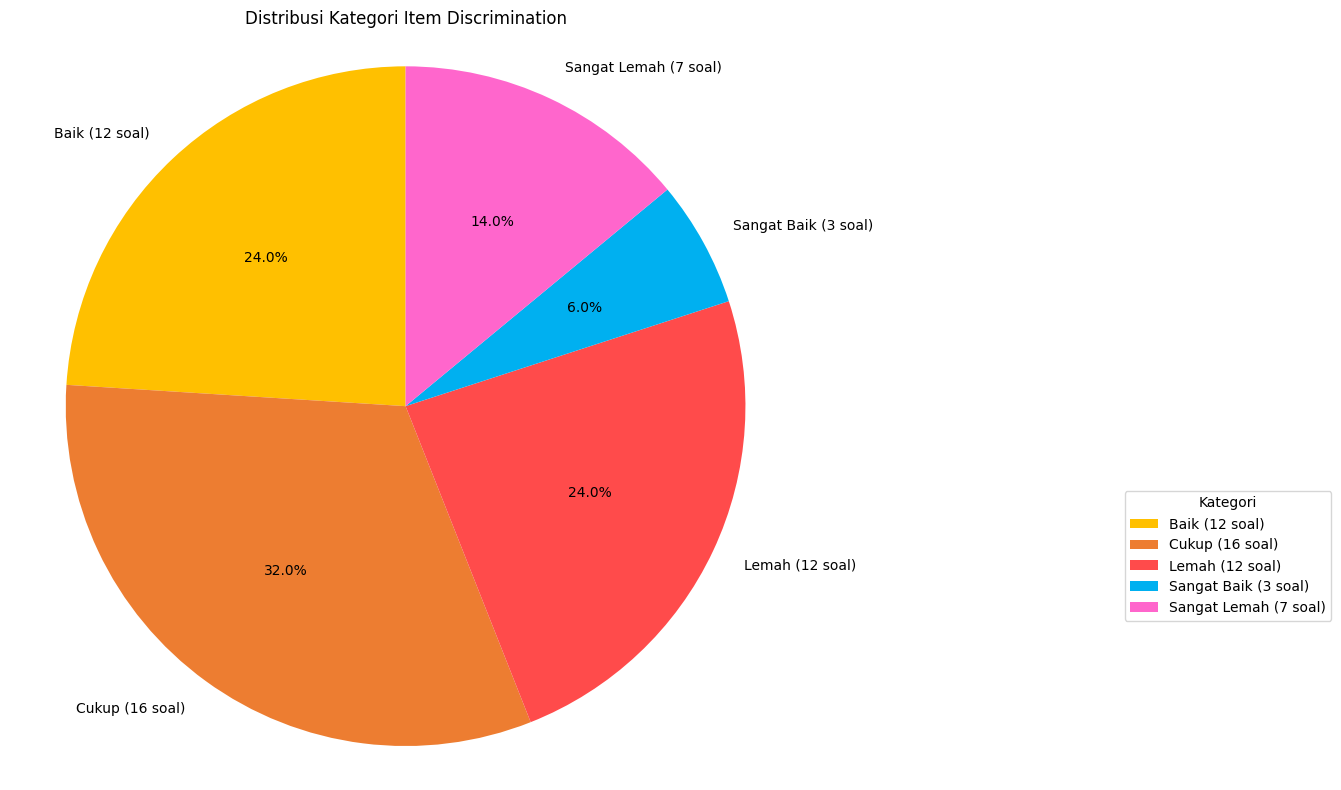

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data input yang disesuaikan dengan tabel yang kamu berikan
data = {
    "Item": [f"Q.{i}" for i in range(1, 51)],
    "Kategori": [
        "Cukup",
        "Cukup",
        "Cukup",
        "Cukup",
        "Sangat Baik",
        "Cukup",
        "Lemah",
        "Sangat Lemah",
        "Cukup",
        "Lemah",
        "Sangat Lemah",
        "Baik",
        "Cukup",
        "Cukup",
        "Cukup",
        "Lemah",
        "Baik",
        "Baik",
        "Lemah",
        "Baik",
        "Lemah",
        "Sangat Baik",
        "Cukup",
        "Cukup",
        "Baik",
        "Baik",
        "Sangat Lemah",
        "Sangat Lemah",
        "Lemah",
        "Baik",
        "Lemah",
        "Lemah",
        "Baik",
        "Cukup",
        "Lemah",
        "Lemah",
        "Cukup",
        "Lemah",
        "Sangat Lemah",
        "Sangat Baik",
        "Sangat Lemah",
        "Lemah",
        "Baik",
        "Cukup",
        "Baik",
        "Cukup",
        "Cukup",
        "Sangat Lemah",
        "Baik",
        "Baik"
    ]
}






# Buat DataFrame
df = pd.DataFrame(data)

# Hitung frekuensi per kategori
kategori_counts = df['Kategori'].value_counts().sort_index()

# Hitung persentase
kategori_percent = kategori_counts / kategori_counts.sum() * 100

# Warna sesuai kategori
warna_kategori = {
    "Sangat Baik": "#00B0F0",     # Biru muda
    "Baik": "#FFC000",            # Kuning
    "Cukup": "#ED7D31",           # Oranye
    "Lemah": "#FF4B4B",           # Merah terang
    "Sangat Lemah": "#FF66CC"     # Merah muda
}

# Buat pie chart
plt.figure(figsize=(15, 8))
plt.pie(kategori_percent,
        labels=[f"{kat} ({val} soal)" for kat, val in kategori_counts.items()],
        autopct='%1.1f%%',
        colors=[warna_kategori[kat] for kat in kategori_counts.index],
        startangle=90)

plt.title("Distribusi Kategori Item Discrimination")
plt.axis('equal')
plt.legend(title="Kategori", loc="center left", bbox_to_anchor=(1.4, 0.3))
plt.tight_layout()
plt.show()


**Difficulty**

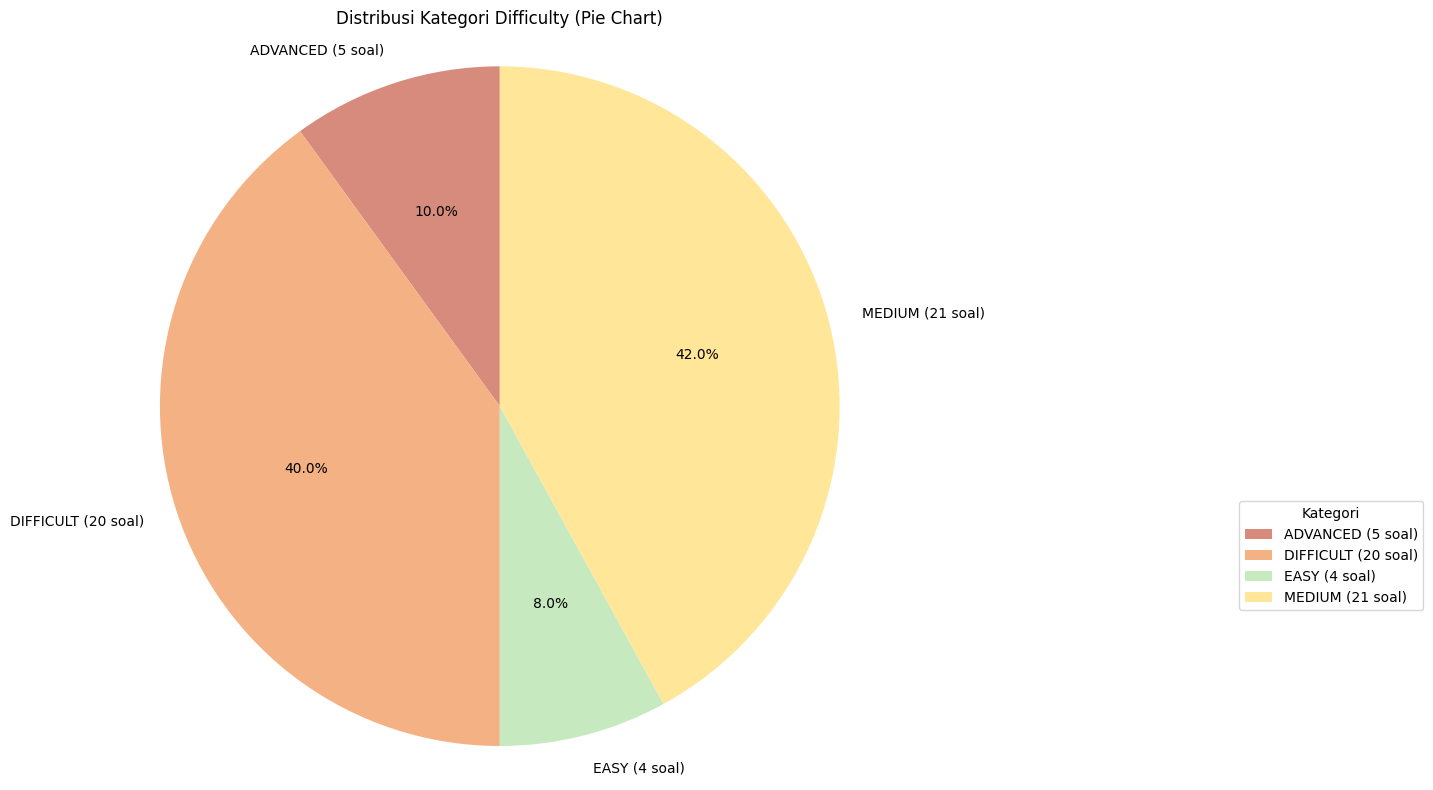

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data input sesuai tabel "Kategori Difficulty"
data = {
    "Item": [f"Q.{i}" for i in range(1, 51)],
    "Kategori Difficulty": [
        "EASY",
        "EASY",
        "MEDIUM",
        "DIFFICULT",
        "MEDIUM",
        "MEDIUM",
        "MEDIUM",
        "MEDIUM",
        "ADVANCED",
        "DIFFICULT",
        "ADVANCED",
        "MEDIUM",
        "EASY",
        "MEDIUM",
        "MEDIUM",
        "DIFFICULT",
        "MEDIUM",
        "DIFFICULT",
        "ADVANCED",
        "EASY",
        "MEDIUM",
        "DIFFICULT",
        "MEDIUM",
        "MEDIUM",
        "MEDIUM",
        "MEDIUM",
        "DIFFICULT",
        "ADVANCED",
        "MEDIUM",
        "MEDIUM",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "MEDIUM",
        "MEDIUM",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "MEDIUM",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "DIFFICULT",
        "MEDIUM",
        "ADVANCED",
        "MEDIUM"
    ]
}





# Buat DataFrame
df = pd.DataFrame(data)

# Hitung jumlah kategori
kategori_counts = df["Kategori Difficulty"].value_counts().sort_index()

# Hitung persentase
kategori_percent = kategori_counts / kategori_counts.sum() * 100

# Warna yang ditentukan
warna_kategori = {
    "EASY": "#c7e9c0",
    "MEDIUM": "#ffe699",
    "DIFFICULT": "#f4b183",
    "ADVANCED": "#d68b7c"
}

# Buat pie chart
plt.figure(figsize=(15, 8))
plt.pie(kategori_percent,
        labels=[f"{kat} ({val} soal)" for kat, val in kategori_counts.items()],
        autopct='%1.1f%%',
        colors=[warna_kategori[kat] for kat in kategori_counts.index],
        startangle=90)

plt.title("Distribusi Kategori Difficulty (Pie Chart)")
plt.axis('equal')
plt.legend(title="Kategori", loc="center left", bbox_to_anchor=(1.4, 0.3))
plt.tight_layout()
plt.show()
